In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt


In [2]:
baseball = pd.read_csv("mlb-historic-wins.csv")
baseball

,wins,attend
0,100,1797438
1,64,1206776
2,70,1200365
3,97,2288714
4,86,1857408
...,...,...
860,87,2416237
861,92,1510300
862,91,3178273
863,74,1374141


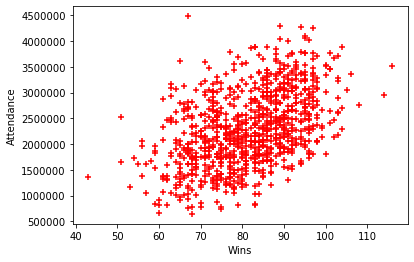

In [3]:
# Importing the dataset
%matplotlib inline
plt.xlabel('Wins')
plt.ylabel('Attendance')
plt.scatter(baseball.wins,baseball.attend, color='red', marker='+')


In [4]:
new_wins = baseball.drop('attend',axis='columns')
new_wins

,wins
0,100
1,64
2,70
3,97
4,86
...,...
860,87
861,92
862,91
863,74


In [5]:
new_attend = baseball.attend
new_attend

0      1797438
1      1206776
2      1200365
3      2288714
4      1857408
        ...   
860    2416237
861    1510300
862    3178273
863    1374141
864    3080980
Name: attend, Length: 865, dtype: int64

In [6]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_wins,new_attend)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
reg.predict([[80]])

array([2256367.22394001])

In [8]:
reg.coef_

array([30580.12130596])

In [9]:
reg.intercept_

-190042.48053660896

In [10]:
reg.predict([[2500000]])

array([7.64501132e+10])

In [11]:
wins_list = pd.read_csv("predict-wins-groups.csv")
wins_list.head(3)

,wins
0,60
1,65
2,70


In [12]:
p = reg.predict(wins_list)
p

array([1644764.79782086, 1797665.40435065, 1950566.01088044,
       2103466.61741022, 2256367.22394001, 2409267.8304698 ,
       2562168.43699959, 2715069.04352938, 2867969.65005917,
       3020870.25658896])

In [13]:
wins_list['attend']=p
wins_list

,wins,attend
0,60,1.644765e+06
1,65,1.797665e+06
2,70,1.950566e+06
3,75,2.103467e+06
4,80,2.256367e+06
5,85,2.409268e+06
6,90,2.562168e+06
7,95,2.715069e+06
8,100,2.867970e+06
9,105,3.020870e+06


In [14]:
X = baseball["wins"].values.reshape(-1, 1)
y = baseball["attend"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (865, 1) (865, 1)


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [17]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")
print(f"(RMSE): {rmse}")

Mean Squared Error (MSE): 448346693723.896
R-squared (R2 ): 0.22072789627861011
(RMSE): 669586.9575521136


In [ ]:
model.score(X_test, y_test)

In [ ]:
wins_list.to_csv("prediction-mlb-wins.csv")